# Project 3 - Retail    
## Prepared and Submitted By: Saroj Kumar Bisi 04.09.2020

**DESCRIPTION**

**Problem Statement**

 * Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques.
 
 * You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation. 
 
 * You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

**Data Snapshot**
 * Training Data Description: Historic sales at Store-Day level for about two years for a retail giant, for more than 1000 stores. Also, other sale influencers like, whether on a particular day the store was fully open or closed for renovation, holiday and special event details, are also provided
 Downlod the **data sets** from _**[here](https://github.com/Simplilearn-Edu/Artificial-Intelligence-Capstone-Project-Datasets)**_.
 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from xgboost import XGBRegressor,XGBRFRegressor

from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


from sklearn.decomposition import PCA,KernelPCA

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
storeList=np.arange(1,11) #  Take data only 10 stores
n_splits=5


import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM,Flatten,Dropout,BatchNormalization

## Project Task: Week 1

**Exploratory Data Analysis (EDA) and Linear Regression:**

1. Transform the variables by using data manipulation techniques like, One-Hot Encoding.
2. Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.
3. Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error)
   and MAE(Mean Absolute Error) and determine which metric makes more sense. Can there be a better accuracy metric? 
   
   a) Train a single model for all stores, using storeId as a feature.
   
   b) Train separate model for each store.
   
   c) Which performs better and Why? [In the first case, parameters are shared and not very free but not in second case].
   
   d) Try Ensemble of b) and c). What are the findings?
   
   e) Use Regularized Regression. It should perform better in an unseen test set. Any insights??
   
   f) Open-ended modeling to get possible predictions.
   
    



### Code :

In [2]:
#import train data
traindata=pd.read_csv('train_data.csv')
test_hiddata=pd.read_csv('test_data_hidden.csv')
testdata=pd.read_csv('test_data.csv')

In [3]:
traindata.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0


In [4]:
test_hiddata.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1


In [5]:
testdata.head(1)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,1,1,0,1


In [6]:
print('the shape of train data: ', traindata.shape)
print('the shape of test_hidden data: ', test_hiddata.shape)
print('the shape of test data: ', testdata.shape)

the shape of train data:  (982644, 9)
the shape of test_hidden data:  (34565, 9)
the shape of test data:  (34565, 7)


In [7]:
# Observations:
#shape of train data and test hidden data is same and these two can be merged for performing EDA together
# testdata does not contain 'Customers' feature where as train data contains the same feature. It means we can exclude this feature from train

#### Data Preprocessing,EDA & Feature Engineering

In [4]:
# Since the train0 and train_hidden0 are having same features its worth to merge them together and perform the EDA
#Data merge
dataSet=pd.concat([traindata,test_hiddata])
print('shape of combined data is: ',dataSet.shape)
dataSet.head()

shape of combined data is:  (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [9]:
#1. Check for null values
dataSet.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 34564
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 77.6+ MB


In [11]:
dataSet.StateHoliday.value_counts()

0    886058
0    100101
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [12]:
dataSet.StateHoliday.value_counts()

0    886058
0    100101
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

#### lets analyzse the data and see if a,b,c catagory indicates any holiday or not !!!

In [14]:
dataSet[dataSet.StateHoliday.isin(['a','b','c'])].Date.value_counts()

2015-04-06    1115
2013-12-25    1115
2014-05-29    1115
2014-05-01    1115
2015-05-01    1115
2013-05-09    1115
2015-04-03    1115
2015-05-14    1115
2014-04-18    1115
2013-03-29    1115
2015-05-25    1115
2013-10-03    1115
2013-12-26    1115
2014-01-01    1115
2014-04-21    1115
2013-05-01    1115
2013-04-01    1115
2013-05-20    1115
2014-06-09    1115
2013-01-01    1114
2015-01-01    1079
2014-10-03     935
2014-12-25     935
2014-12-26     935
2013-05-30     766
2014-06-19     766
2015-06-04     766
2013-11-01     579
2014-11-01     399
2014-01-06     309
2015-01-06     309
2013-01-06     309
2013-08-15     180
2014-10-31     167
2013-10-31     167
2014-11-19      75
2013-11-20      75
Name: Date, dtype: int64

#### From data analysis of a, b, c it seems that StateHoliday=='a','b','c' seems to be an actual holiday 
    example(01.01. or 25.12, 26.12 etc)

In [5]:
#Replacing char '0' with numeric 0 and replace 'a','b','c', with 1
dataSet.StateHoliday.replace('0',0,inplace=True)
dataSet.StateHoliday.replace(['a','b','c'],1,inplace=True)

# Date  feature is of object datatype. We can convert it  to Datetime
dataSet['Date']=pd.to_datetime(dataSet['Date'])
#dataSet['Date']=dataSet.Date.astype('int64')

In [6]:
dataSet.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [18]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 34564
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 77.6 MB


In [19]:
dataSet.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


#### Apply the Data Preprocessing steps on Train and Test Data separately

In [3]:
traindata.StateHoliday.replace('0',0,inplace=True)
traindata.StateHoliday.replace(['a','b','c'],1,inplace=True)


test_hiddata.StateHoliday.replace('0',0,inplace=True)
test_hiddata.StateHoliday.replace(['a','b','c'],1,inplace=True)

# Convert the Date column into  datatime and then split the date column into Day, Week, DayofYear for Train Data
traindata['Date']=pd.to_datetime(traindata['Date'])
traindata.insert(1,'Week',traindata['Date'].dt.week)
traindata.insert(2,'Day',traindata['Date'].dt.day)
traindata.insert(3,'DayofYear',traindata['Date'].dt.dayofyear)

# Convert the Date column into  datatime and then split the date column into Day, Week, DayofYear for Test Data
test_hiddata['Date']=pd.to_datetime(test_hiddata['Date'])
test_hiddata.insert(1,'Week',test_hiddata['Date'].dt.week)
test_hiddata.insert(2,'Day',test_hiddata['Date'].dt.day)
test_hiddata.insert(3,'DayofYear',test_hiddata['Date'].dt.dayofyear)

traindata_init= traindata # this is just to take a backup of actual train data
test_hiddata_init=test_hiddata # this is just to take a backup of actual test data

In [21]:
traindata.head(1)

,Store,Week,Day,DayofYear,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,27,30,181,2,2015-06-30,5735,568,1,1,0,0


In [22]:
test_hiddata.head(1)

,Store,Week,Day,DayofYear,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,31,31,212,5,2015-07-31,5263,555,1,1,0,1


%%time
# lets do pair plot to see the relationship between features and target(Sales).
plt.figure(figsize=[7,10])
plt.subplot(3,3,1)
sns.pairplot(traindata,x_vars=['Store','Date','Sales'],y_vars=['Store','Date','Sales'],kind='scatter')
plt.show()

%%time
# lets do pair plot to see the relationship between features and target(Sales).
plt.figure(figsize=[7,10])
plt.subplot(3,3,1)
sns.pairplot(traindata,x_vars=['DayOfWeek','Customers','Sales'],y_vars=['DayOfWeek','Customers','Sales'],kind='scatter')
plt.show()

%%time
# lets do pair plot to see the relationship between features and target(Sales).
plt.figure(figsize=[7,10])
plt.subplot(4,4,1)
sns.pairplot(traindata,x_vars=['Open','Promo','StateHoliday','Sales'],y_vars=['Open','Promo','StateHoliday','Sales'],kind='scatter')
plt.show()

# Data distribution plot. 
plt.figure(figsize=[12,14])
features=dataSet.columns
n=1
for f in features:
    plt.subplot(10,4,n)
    sns.distplot(dataSet[f], kde=False)
    sns.despine()
    n=n+1
plt.tight_layout()
plt.show()

### Feature engineering

In [23]:
# Lets apply correlation analysis to sekect the best features
traindata.corr()
#from below correlation results it seems that The best fetures wrt to 'Sales' are :
# Customers(89% corr), Open(68% corr), DayOfWeek(-46% corr ),Promo(45% corr), StateHoliday(-25% corr)

,Store,Week,Day,DayofYear,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,1.000000,0.001467,0.000025,0.001510,-0.000009,0.005338,0.024410,-0.000030,0.000064,0.000543,-0.000066
Week,0.001467,1.000000,0.067457,0.968224,-0.004208,0.052120,0.041524,0.002938,-0.001098,-0.000328,0.065093
Day,0.000025,0.067457,1.000000,0.097123,0.006992,-0.014450,-0.005487,0.033735,-0.117171,-0.067317,0.014925
DayofYear,0.001510,0.968224,0.097123,1.000000,-0.004873,0.046971,0.037935,0.000974,-0.023063,-0.004752,0.100981
DayOfWeek,-0.000009,-0.004208,0.006992,-0.004873,1.000000,-0.461249,-0.386213,-0.527372,-0.394777,-0.053762,-0.200570
Sales,0.005338,0.052120,-0.014450,0.046971,-0.461249,1.000000,0.895700,0.679248,0.451383,-0.257671,0.076141
Customers,0.024410,0.041524,-0.005487,0.037935,-0.386213,0.895700,1.000000,0.618407,0.316378,-0.230050,0.064804
Open,-0.000030,0.002938,0.033735,0.000974,-0.527372,0.679248,0.618407,1.000000,0.294143,-0.383098,0.076865
Promo,0.000064,-0.001098,-0.117171,-0.023063,-0.394777,0.451383,0.316378,0.294143,1.000000,-0.012089,0.055857
StateHoliday,0.000543,-0.000328,-0.067317,-0.004752,-0.053762,-0.257671,-0.230050,-0.383098,-0.012089,1.000000,0.156845


COLUMN_NAMES = ["Approach","Model_Name","r2_Scores","RMSE","MAE"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)

def model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test):
    global df_model_selection
     
    r2score =0
    RMSE =0
    MAE = 0
    #print('Approach is: ',approach)
    #if ((approach != 'Model Training with PCA')|(approach !='Model Training with  Kernel PCA')|(approach != 'LSTM')):
        # Standaradization of Data
        #SC=StandardScaler()
        #X_train=SC.fit_transform(X_train) # Perform feature scaling on train data
        #X_test=SC.fit_transform(X_test) # Perform feature scaling on test data
    #else:
        #print('Standard SCaling is performed on Train and Test Data')
    
    if model_name=='LSTM':
        model_obj.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,batch_size=32,verbose=0)
    else:
        model_obj.fit(X_train, y_train)
        
    test_ds_predicted = model_obj.predict( X_test )
    r2score=round(r2_score(y_true=y_test, y_pred=test_ds_predicted),2)
    RMSE=round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_ds_predicted)),0)
    MAE=round(mean_absolute_error(y_true=y_test, y_pred=test_ds_predicted),2)
    
    df_model_selection = pd.concat([df_model_selection,pd.DataFrame([[approach,
                                                                      model_name,
                                                                      r2score,
                                                                      RMSE,
                                                                      MAE
                                                                     ]], 
                                                                    columns =COLUMN_NAMES)])
    

In [8]:
COLUMN_NAMES = ["Approach","Model Name", 
                "r2 Scores","Range of r2 Scores","SD of r2 Scores",
                "RMSE","Range of RMSE",
                "MAE","Range of MAE"
               ]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)

def model_traintest_CV(model_obj, model_name, approach,X,y,n_splits):
    global df_model_selection
    
    skf = StratifiedKFold(n_splits, random_state=12,shuffle=True)
    
    weighted_r2_score = []
    weighted_RMSE = []
    weighted_MAE = []
     
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        
        if ((model_name=='LSTM')|(model_name=='ANN')):
            model_obj.fit(X_train,y_train,epochs=150,batch_size=32,verbose=0)
            #model_obj.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,batch_size=32,verbose=0)
        else:
            model_obj.fit(X_train, y_train)
        
        test_ds_predicted = model_obj.predict( X_test )   
        weighted_r2_score.append(round(r2_score(y_true=y_test, y_pred=test_ds_predicted),2))
        weighted_RMSE.append(round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_ds_predicted)),0))
        weighted_MAE.append(round(mean_absolute_error(y_true=y_test, y_pred=test_ds_predicted),2))
     
    #r2_score computation
    sd_weighted_r2_score = round(np.std(weighted_r2_score, ddof=1),2)
    range_of_r2_scores = "{}-{}".format(min(weighted_r2_score),max(weighted_r2_score)) 
    
    
    #RMSE computation
    #sd_weighted_RMSE = round(np.std(weighted_RMSE, ddof=1),2)
    range_of_RMSE = "{}-{}".format(min(weighted_RMSE),max(weighted_RMSE))
    
    #MAE computation
    #sd_weighted_MAE = round(np.std(weighted_MAE, ddof=1),2)
    range_of_MAE = "{}-{}".format(min(weighted_MAE),max(weighted_MAE))
    
    df_model_selection = pd.concat([df_model_selection,pd.DataFrame([[approach,
                                                                      model_name,
                                                                      sorted(weighted_r2_score),
                                                                      range_of_r2_scores,
                                                                      sd_weighted_r2_score,
                                                                      sorted(weighted_RMSE),
                                                                      range_of_RMSE,                                                        
                                                                      sorted(weighted_MAE),
                                                                      range_of_MAE#,                                                                     
                                                                     ]], 
                                                                    columns =COLUMN_NAMES)])

### Model Building and Training with Cross Validation
    a.Train a single model for 10 stores
    b. Train separate models for each store

In [13]:
%%time
#Prepare Data

traindata=traindata_init[traindata_init.Store.isin(storeList)]
test_hiddata=test_hiddata_init[test_hiddata_init.Store.isin(storeList)]


#Lets take data only for 10 stores
X_train=traindata.drop(columns=['Sales','Date']).values
y_train=traindata.Sales.values
X_test=test_hiddata.drop(columns=['Sales','Date']).values
y_test=test_hiddata.Sales.values

#Lets take data only for Store-1
X_train1=traindata[traindata.Store==1].drop(columns=['Sales','Date']).values
y_train1=traindata[traindata.Store==1].Sales.values
X_test1=test_hiddata[test_hiddata.Store==1].drop(columns=['Sales','Date']).values
y_test1=test_hiddata[test_hiddata.Store==1].Sales.values

#Lets take data only for Store-2
X_train2=traindata[traindata.Store==2].drop(columns=['Sales','Date']).values
y_train2=traindata[traindata.Store==2].Sales.values
X_test2=test_hiddata[test_hiddata.Store==2].drop(columns=['Sales','Date']).values
y_test2=test_hiddata[test_hiddata.Store==2].Sales.values

#Lets take data only for Store-3
X_train3=traindata[traindata.Store==3].drop(columns=['Sales','Date']).values
y_train3=traindata[traindata.Store==3].Sales.values
X_test3=test_hiddata[test_hiddata.Store==3].drop(columns=['Sales','Date']).values
y_test3=test_hiddata[test_hiddata.Store==3].Sales.values

#Lets take data only for Store-4
X_train4=traindata[traindata.Store==4].drop(columns=['Sales','Date']).values
y_train4=traindata[traindata.Store==4].Sales.values
X_test4=test_hiddata[test_hiddata.Store==4].drop(columns=['Sales','Date']).values
y_test4=test_hiddata[test_hiddata.Store==4].Sales.values

#Lets take data only for Store-5
X_train5=traindata[traindata.Store==5].drop(columns=['Sales','Date']).values
y_train5=traindata[traindata.Store==5].Sales.values
X_test5=test_hiddata[test_hiddata.Store==5].drop(columns=['Sales','Date']).values
y_test5=test_hiddata[test_hiddata.Store==5].Sales.values

#Lets take data only for Store-6
X_train6=traindata[traindata.Store==6].drop(columns=['Sales','Date']).values
y_train6=traindata[traindata.Store==6].Sales.values
X_test6=test_hiddata[test_hiddata.Store==6].drop(columns=['Sales','Date']).values
y_test6=test_hiddata[test_hiddata.Store==6].Sales.values

#Lets take data only for Store-7
X_train7=traindata[traindata.Store==7].drop(columns=['Sales','Date']).values
y_train7=traindata[traindata.Store==7].Sales.values
X_test7=test_hiddata[test_hiddata.Store==7].drop(columns=['Sales','Date']).values
y_test7=test_hiddata[test_hiddata.Store==7].Sales.values

#Lets take data only for Store-8
X_train8=traindata[traindata.Store==8].drop(columns=['Sales','Date']).values
y_train8=traindata[traindata.Store==8].Sales.values
X_test8=test_hiddata[test_hiddata.Store==8].drop(columns=['Sales','Date']).values
y_test8=test_hiddata[test_hiddata.Store==8].Sales.values

#Lets take data only for Store-9
X_train9=traindata[traindata.Store==9].drop(columns=['Sales','Date']).values
y_train9=traindata[traindata.Store==9].Sales.values
X_test9=test_hiddata[test_hiddata.Store==9].drop(columns=['Sales','Date']).values
y_test9=test_hiddata[test_hiddata.Store==9].Sales.values

#Lets take data only for Store-10
X_train10=traindata[traindata.Store==10].drop(columns=['Sales','Date']).values
y_train10=traindata[traindata.Store==10].Sales.values
X_test10=test_hiddata[test_hiddata.Store==10].drop(columns=['Sales','Date']).values
y_test10=test_hiddata[test_hiddata.Store==10].Sales.values


#COLUMN_NAMES = ["Approach","Model_Name","r2_Scores","RMSE","MAE"]
COLUMN_NAMES = ["Approach","Model Name","r2 Scores","Range of r2 Scores",
                "SD of r2 Scores","RMSE","Range of RMSE","MAE","Range of MAE"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)


# 1.LinearRegression for  10 stores
approach='Model Training with  10 Stores Data'
X_train = X_train
y_train = y_train
X_test = X_test
y_test = y_test
model_LR=LinearRegression()
model_obj=model_LR
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 2.LinearRegression for  store1
approach='Model Training with Store1 Data'
X_train = X_train1
y_train = y_train1
X_test = X_test1
y_test = y_test1
model_LR1=LinearRegression()
model_obj=model_LR1
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 3.LinearRegression for  store2
approach='Model Training with Store2 Data'
X_train = X_train2
y_train = y_train2
X_test = X_test2
y_test = y_test2
model_LR2=LinearRegression()
model_obj=model_LR2
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 4.LinearRegression for  store3
approach='Model Training with Store3 Data'
X_train = X_train3
y_train = y_train3
X_test = X_test3
y_test = y_test3
model_LR3=LinearRegression()
model_obj=model_LR3
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 5.LinearRegression for  store4
approach='Model Training with Store4 Data'
X_train = X_train4
y_train = y_train4
X_test = X_test4
y_test = y_test4
model_LR4=LinearRegression()
model_obj=model_LR4
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 6.LinearRegression for  store5
approach='Model Training with Store5 Data'
X_train = X_train5
y_train = y_train5
X_test = X_test5
y_test = y_test5
model_LR5=LinearRegression()
model_obj=model_LR5
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 7.LinearRegression for  store6
approach='Model Training with Store6 Data'
X_train = X_train6
y_train = y_train6
X_test = X_test6
y_test = y_test6
model_LR6=LinearRegression()
model_obj=model_LR6
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 8.LinearRegression for  store7
approach='Model Training with Store7 Data'
X_train = X_train7
y_train = y_train7
X_test = X_test7
y_test = y_test7
model_LR7=LinearRegression()
model_obj=model_LR7
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 9.LinearRegression for  store8
approach='Model Training with Store8 Data'
X_train = X_train8
y_train = y_train8
X_test = X_test8
y_test = y_test8
model_LR8=LinearRegression()
model_obj=model_LR8
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 10.LinearRegression for  store9
approach='Model Training with Store9 Data'
X_train = X_train9
y_train = y_train9
X_test = X_test9
y_test = y_test9
model_LR9=LinearRegression()
model_obj=model_LR9
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 11.LinearRegression for  store10
approach='Model Training with Store10 Data'
X_train = X_train10
y_train = y_train10
X_test = X_test10
y_test = y_test10
model_LR10=LinearRegression()
model_obj=model_LR10
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


######################Regularized Linear Regression Method ######################
#Data from 10 stores
X_train=traindata.drop(columns=['Sales','Date']).values
y_train=traindata.Sales.values
X_test=test_hiddata.drop(columns=['Sales','Date']).values
y_test=test_hiddata.Sales.values

# 12.Regularized Linear Regression- Lasso
approach='Model Training with  10 Stores Data'
model_Lasso=Lasso()
model_obj=model_Lasso
model_name='Regularized Linear Regression- Lasso'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


# 13.Regularized Linear Regression- Ridge
approach='Model Training with  10 Stores Data'
model_Ridge=Ridge()
model_obj=model_Ridge
model_name='Regularized Linear Regression- Ridge'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


# 14.Regularized Linear Regression- ElasticNet
approach='Model Training with  10 Stores Data'
model_ElasticNet=ElasticNet()
model_obj=model_ElasticNet
model_name='Regularized Linear Regression- ElasticNet'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

#########################################################################
####################Ensemble Learning####################################
########################################################################

# 15.Ensemble Learning
from sklearn.ensemble import VotingRegressor
model_ensemble = VotingRegressor([('M10', model_LR),
                                  ('M1',model_LR1),
                                  ('M3',model_LR3),
                                  ('M5',model_LR5),
                                      ('M6',model_LR6),
                                      ('M7',model_LR7),
                                      ('M8',model_LR8),
                                     ('MR',model_Ridge)
                                      ])

approach='Ensemble Learning'
model_obj=model_ensemble
model_name='Ensemble Learner LR+RegLR'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


######################OTHER OPEN METHODS - BOOSTING ######################

# 15.Lets Use Boosting Technique(XGboost)
approach='Model Training with  10 Stores Data'
model_XGBR=XGBRegressor()
model_obj=model_XGBR
model_name='XGBoost Regressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 16.Lets Use Ensemble Gradiant Boosting
approach='Model Training with  10 Stores Data'
model_GBR=GradientBoostingRegressor()
model_obj=model_GBR
model_name='Gradiant Boosting Regressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


#Exporting the results to csv
#df_model_selection.to_csv("Model_statistics-week1.csv",index = False)
df_model_selection

Wall time: 4.14 s


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


#### Observation!!! 
**Summary of Model Testing and Evaluation at end of Week-2**


    1.The performance of single store model seems to be outperformed for some stores than the combined 10stores model.
    2.Use of Regularized regression did not have much impact to the overall performance.
    3.Boosting method such as XGBoost and  GradientBoosting seems to perform better then Linear Regression model.
    4.Ensemble method performance is also good but not much of a difference from individual Learner in this use case. 
    5.Among all accuracy matrices , R2 score is more meaningful.

## Project Task: Week 2

**Other Regression Techniques:**

1. When store is closed, sales = 0. Can this insight be used for Data Cleaning? Perform this and retrain the model. Any benefits of this step?
2. Use Non-Linear Regressors like Random Forest or other Tree-based Regressors. 
   
   a) Train a single model for all stores, where storeId can be a feature.
   
   b) Train separate model for each store.
   
   **Note:** Dimensional Reduction techniques like, PCA and Tree’s Hyperparameter Tuning will be required. Cross-validate        to  find the best parameters. Infer the performance of both the models

3. Compare the performance of Linear Model and Non-Linear Model from the previous observations. Which performs better and why?

4. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.
    



### Code :

In [14]:
%%time
#Prepare Data
traindata=traindata_init[(traindata_init.Sales !=0)&(traindata_init.Store.isin(storeList))]
test_hiddata=test_hiddata_init[(test_hiddata_init.Sales !=0)&(test_hiddata_init.Store.isin(storeList))]


#Lets take data only for 10 stores
X_train=traindata.drop(columns=['Sales','Date']).values
y_train=traindata.Sales.values
X_test=test_hiddata.drop(columns=['Sales','Date']).values
y_test=test_hiddata.Sales.values


# 1.LinearRegression for  10 stores
approach='Model Training with  10 Stores Data with Open Days '
X_train = X_train
y_train = y_train
X_test = X_test
y_test = y_test
model_LR=LinearRegression()
model_obj=model_LR
model_name='Linear Regression'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)



######################Regularized Linear Regression Method ######################
#Data from 10 stores
X_train=traindata.drop(columns=['Sales','Date']).values
y_train=traindata.Sales.values
X_test=test_hiddata.drop(columns=['Sales','Date']).values
y_test=test_hiddata.Sales.values

# 12.Regularized Linear Regression- Lasso
approach='Model Training with  10 Stores Data with Open Days'
model_Lasso=Lasso()
model_obj=model_Lasso
model_name='Regularized Linear Regression- Lasso'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


# 13.Regularized Linear Regression- Ridge
approach='Model Training with  10 Stores Data with Open Days'
model_Ridge=Ridge()
model_obj=model_Ridge
model_name='Regularized Linear Regression- Ridge'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


# 14.Regularized Linear Regression- ElasticNet
approach='Model Training with  10 Stores Data with Open Days'
model_ElasticNet=ElasticNet()
model_obj=model_ElasticNet
model_name='Regularized Linear Regression- ElasticNet'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

#########################################################################
####################Ensemble Learning####################################
########################################################################

# 15.Ensemble Learning
from sklearn.ensemble import VotingRegressor
model_ensemble = VotingRegressor([('M10', model_LR),
                                     ('MR',model_Ridge)
                                      ])

approach='Ensemble Learning'
model_obj=model_ensemble
model_name='Ensemble Learner LR+RegLR'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


######################OTHER OPEN METHODS - BOOSTING ######################

# 15.Lets Use Boosting Technique(XGboost)
approach='Model Training with  10 Stores Data with Open Days'
model_XGBR=XGBRegressor()
model_obj=model_XGBR
model_name='XGBoost Regressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

# 16.Lets Use Ensemble Gradiant Boosting
approach='Model Training with  10 Stores Data with Open Days'
model_GBR=GradientBoostingRegressor()
model_obj=model_GBR
model_name='Gradiant Boosting Regressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


#Exporting the results to csv
#df_model_selection.to_csv("Model_statistics-week1.csv",index = False)
df_model_selection

Wall time: 3.33 s


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


#### Observation: From above test results it is evident that
    Removing zero sales days from the dataset have negative impact on the overall performance. 
    r2 score of the test models have been reduced.

### # Week 2 Tasks -2 
#1.Use Non-Linear Regressors like Decesion Tree,Random Forest 
#2.Apply Dimensional Reduction techniques like, PCA to extract the best features
#3.Hyperparameter tuning to find the best parameters


In [80]:
traindata

,Store,Week,Day,DayofYear,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,27,30,181,2,2015-06-30,5735,568,1,1,0,0
1,2,27,30,181,2,2015-06-30,9863,877,1,1,0,0
2,3,27,30,181,2,2015-06-30,13261,1072,1,1,0,1
3,4,27,30,181,2,2015-06-30,13106,1488,1,1,0,0
4,5,27,30,181,2,2015-06-30,6635,645,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
980420,6,1,2,2,3,2013-01-02,6089,781,1,0,0,1
980421,7,1,2,2,3,2013-01-02,8244,955,1,0,0,1
980422,8,1,2,2,3,2013-01-02,5419,698,1,0,0,1
980423,9,1,2,2,3,2013-01-02,4903,481,1,0,0,1


In [15]:
%%time
#Prepare data for PCA
traindata=traindata_init[(traindata_init.Sales !=0)&(traindata_init.Store.isin(storeList))]
traindata.reset_index(drop=True,inplace=True)

test_hiddata=test_hiddata_init[(test_hiddata_init.Sales !=0)&(test_hiddata_init.Store.isin(storeList))]
test_hiddata.reset_index(drop=True,inplace=True)

X_train=traindata.drop(columns=['Sales','Date']).values
X_test=test_hiddata.drop(columns=['Sales','Date']).values
X_train=SC.fit_transform(X_train) # Perform feature scaling on train  data
X_test=SC.fit_transform(X_test) # Perform feature scaling on test data

y_train=traindata.Sales.values
y_test=test_hiddata.Sales.values

#print(len(X_train_pca),len(y_train), len(X_test_pca),len(y_test))

model_pca=PCA(n_components=10)# Take all features initially
X_train_pca=model_pca.fit_transform(X_train,y_train)
print('Cumulative Explained Variance Ratio is',np.cumsum(model_pca.explained_variance_ratio_))

model_pca=PCA(n_components=7)
X_train_pca=model_pca.fit_transform(X_train,y_train)
X_test_pca=model_pca.fit_transform(X_test,y_test)



# lets use Tree based regressor
# 17.Lets Use Decision Tree Regressor
approach='Model Training with PCA'
model_DTR=DecisionTreeRegressor()
model_obj=model_DTR
model_name='Decision Tree Regressor'
#model_traintest(model_obj, model_name, approach,X_train_pca,y_train,X_test_pca,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train_pca,y_train,n_splits)
df_model_selection

# 18.Lets Use RandomForest Regressor
approach='Model Training with PCA'
model_RFR=RandomForestRegressor()
model_obj=model_RFR
model_name='RandomForest Regressor'
#model_traintest(model_obj, model_name, approach,X_train_pca,y_train,X_test_pca,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train_pca,y_train,n_splits)



# Lets try kernel_pca######################################## KERNEL PCA #################
model_KPCA=KernelPCA(n_components=7)
X_train_kpca=model_KPCA.fit_transform(X_train,y_train)
X_test_kpca=model_KPCA.fit_transform(X_test,y_test)

# lets use Tree based regressor
# 19.Lets Use Decision Tree Regressor
approach='Model Training with  Kernel PCA'
model_DTR=DecisionTreeRegressor()
model_obj=model_DTR
model_name='Decision Tree Regressor'
#model_traintest(model_obj, model_name, approach,X_train_kpca,y_train,X_test_kpca,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train_kpca,y_train,n_splits)

# 20.Lets Use RandomForest Regressor
approach='Model Training with  Kernel PCA'
model_RFR=RandomForestRegressor()
model_obj=model_RFR
model_name='RandomForest Regressor'
#model_traintest(model_obj, model_name, approach,X_train_kpca,y_train,X_test_kpca,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train_kpca,y_train,n_splits)

df_model_selection

Cumulative Explained Variance Ratio is [0.22190875 0.39717907 0.51632957 0.62915453 0.73868265 0.84119551
 0.9229533  0.99572068 1.         1.        ]
Wall time: 26.7 s


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


#### Observation from PCA feature extraction is that there is a marginal increase in performance in case of Non linear model as compared to Linear model like Linear Regression.

#### Hyper Paremeter Tuning Using Grid Search

In [82]:
%%time
# Lets apply Gridsearch technique for Hyperparameter tuning on Random Forest Regressor
from sklearn.model_selection import RandomizedSearchCV

param_grid={
            'n_estimators':[50,100,120,150,200],
            'max_depth':[5,6,7,8,9,10,15,20,30],
            'min_samples_split':[2,3,4,5],
            'min_samples_leaf':[1,2,3,4],
            'max_features' :['auto', 'sqrt', 'log2']
           }
model_RFR=RandomForestRegressor()
RS = RandomizedSearchCV(estimator=model_RFR,param_distributions=param_grid,cv=10,n_iter=10)

RS.fit(X_train,y_train) 


Wall time: 1min 12s


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 15, 20,
                                                      30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 120, 150,
                                                         200]})

In [83]:
RS.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=5)

In [84]:
RS.best_score_

0.9667579690383045

In [95]:
#Fitting the final model after gridsearch

# 24.Randorm Forest Regressor
approach='Model Training after Hyperparameter Tuning'
model_RFR=RandomForestRegressor(max_depth=20, min_samples_split=5)
model_obj=model_RFR
model_name='Random Forest Regressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


df_model_selection

,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


In [87]:
%%time
# Lets apply Gridsearch technique for Hyperparameter tuning on XGBoost Regressor
from sklearn.model_selection import RandomizedSearchCV

param_grid={
            'learning_rate':[0.05,0.1,0.5,0.9,1],
            'booster':['gbtree','gblinear','dart'],
            'n_estimators':[50,100,120,150,200],
            'max_depth':[5,6,7,8,9,10,15,20,30],
            'min_samples_split':[2,3,4,5],
            'min_samples_leaf':[1,2,3,4],
            'max_features' :['auto', 'sqrt', 'log2']
           }
model_XGBRFR=XGBRFRegressor()
RS = RandomizedSearchCV(estimator=model_XGBRFR,param_distributions=param_grid,cv=10,n_iter=10)

RS.fit(X_train,y_train) 


[16:13:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf

RandomizedSearchCV(cv=10,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            obje...
                                            random_state=None, reg_alpha=None,
                                            scale_pos_weight=None,
                        

In [88]:
RS.best_score_

0.9677237197184988

In [89]:
RS.best_estimator_

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=15,
               max_features='auto', min_child_weight=1, min_samples_leaf=3,
               min_samples_split=2, missing=nan, monotone_constraints='()',
               n_estimators=120, n_jobs=0, num_parallel_tree=120,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [96]:
model_XGBRFR=XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=15,
               max_features='auto', min_child_weight=1, min_samples_leaf=3,
               min_samples_split=2, missing=np.nan, monotone_constraints='()',
               n_estimators=120, n_jobs=0, num_parallel_tree=120,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

#Fitting the final model after gridsearch
# 25.Randorm Forest Regressor
approach='Model Training after Hyperparameter Tuning'
model_obj=model_XGBRFR
model_name='XGBoost RFRegressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

df_model_selection

[16:28:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:28:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:28:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf

,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


## Train a Time-series model on the data taking time as the only feature.This will be a store-level training.

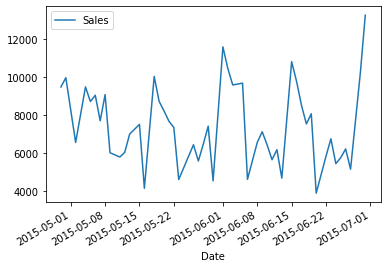

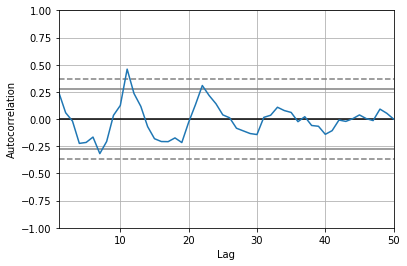

In [16]:
# Lets take data only for one store and build a time series model.Lets rendomly select store ID3
traindata=traindata_init[(traindata_init.Sales !=0)&(traindata_init.Store==3)][['Date','Sales']]
traindata['Date']=pd.to_datetime(traindata['Date'])
traindata.reset_index(drop=True,inplace=True)

testdata=test_hiddata_init[(test_hiddata_init.Sales !=0)&(test_hiddata_init.Store==3)][['Date','Sales']]
testdata['Date']=pd.to_datetime(testdata['Date'])
testdata.reset_index(drop=True,inplace=True)


## Step 2: Visualize the Data
traindata[0:50].plot(x='Date',y='Sales')
plt.show()

## Step 3: Visualize the Data
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(traindata[0:50]['Sales'])
plt.show()



ADF Test Statistic : -5.686600936105958
p-value : 8.251894494716104e-07
#Lags Used : 19
Number of Observations Used : 732
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


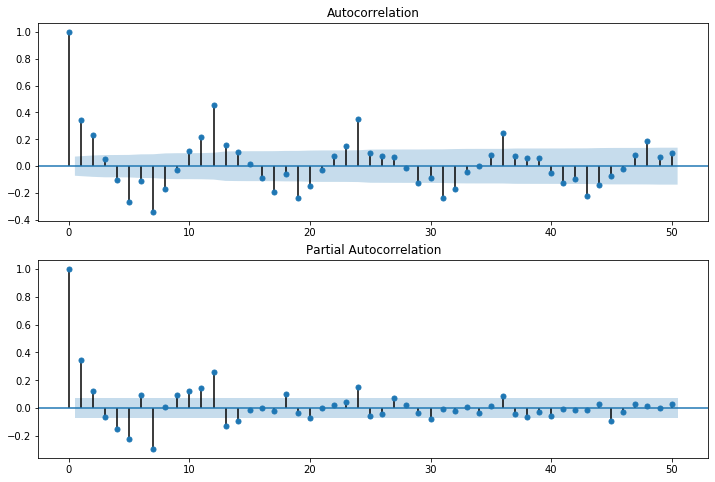

In [17]:
## Step 4: Testing For Stationarity with Augmented Dickey-Fuller-Test

from statsmodels.tsa.stattools import adfuller
#Hypothesis Testing
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(traindata['Sales'])


## Step 5:
# Find out the value of p, q and d.
# p : lag of Auto regressive(AR) model
# q: lag of Moving Average(MA) Model
# d: differencing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(traindata['Sales'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(traindata['Sales'],lags=50,ax=ax2)
plt.show()

#### Observation
    From above ACF and PACF plot it is evident that both ACF and PACF are having Geometric Decay.
    Therfore we can go for ARIMA model with different combinations of p,d and q values and select the model with minimal AIC,    BIC value. Below combinations of p,d,q were tried and found that (2,0,2) combination produces the least AIC and BIC value.
    (2,0,2)  (1,0,1)  (0,0,1)  (0,0,2)   (1,0,2)   (2,0,1)   (1,0,0)  (2,0,0)

In [30]:
# Step 6:ARIMA Modeling
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(traindata['Sales'],order=(2,0,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  752
Model:                     ARMA(2, 2)   Log Likelihood               -6757.351
Method:                       css-mle   S.D. of innovations           1931.697
Date:                Thu, 03 Sep 2020   AIC                          13526.702
Time:                        23:49:31   BIC                          13554.438
Sample:                             0   HQIC                         13537.388
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6949.3994     78.577     88.441      0.000    6795.392    7103.407
ar.L1.Sales     1.6853      0.021     81.435      0.000       1.645       1.726
ar.L2.Sales    -0.9465      0.019    -50.184      0.000      -0.984      -0.910
ma.L1.Sales    -1.5033      0.039    -38.587      0.000      -1.580      -1.427
ma.L2.Sales     0.7945      0.032     24.977      0.000       0.732       0.857
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8902           -0.5138j            1.0278           -0.0833
AR.2            0.8902           +0.5138j            1.0278            0.0833
MA.1            0.9460           -0.6030j            1.1219           -0.0903
MA.2            0.9460           +0.6030j            1.1219            0.0903
-----------------------------------------------------------------------------
"""

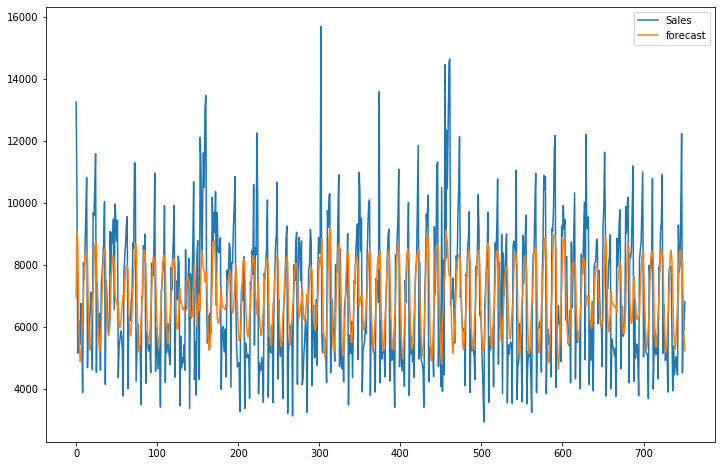

In [31]:
#Step 7: Prediction Train Data
traindata['forecast']=model_fit.predict().round()
traindata[['Sales','forecast']].plot(figsize=(12,8))

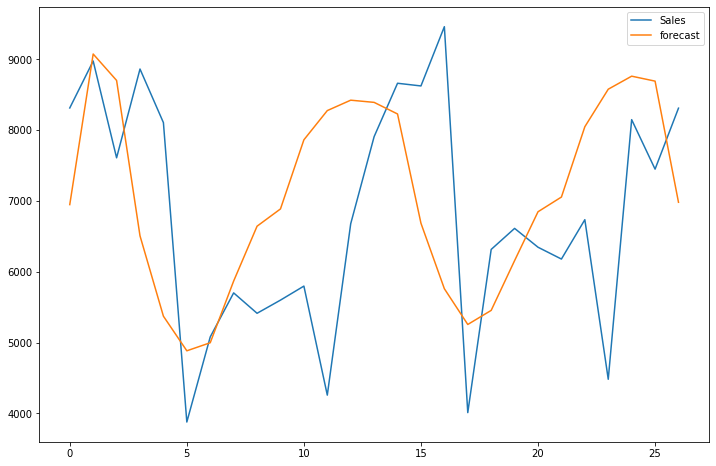

In [32]:
#Step 7: Prediction Test Data
testdata['forecast']=model_fit.predict().round()
testdata[['Sales','forecast']].plot(figsize=(12,8))

In [33]:
#Step8: Model Evaluation
train_score=round(r2_score(y_true=traindata.Sales, y_pred=traindata.forecast),2)
test_score=round(r2_score(y_true=testdata.Sales, y_pred=testdata.forecast),2)
print('Train Score is : {} and Test Score is :{} for store #3'.format(train_score,test_score))

Train Score is : 0.23 and Test Score is :-0.23 for store #3


## Project Task: Week 3

**Implementing Neural Networks:**

1. Train a LSTM on the same set of features and compare the result with traditional time-series model.
       
2. Comment on the behavior of all the models you have built so far.

3. Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.

4. Is it possible to have separate prediction models for each cluster? Compare results with the previous models
    



### Code :

In [34]:
#Prepare Data
traindata=traindata_init[(traindata_init.Sales !=0)&(traindata_init.Store.isin(storeList))]
traindata.reset_index(drop=True,inplace=True)

test_hiddata=test_hiddata_init[(test_hiddata_init.Sales !=0)&(test_hiddata_init.Store.isin(storeList))]
test_hiddata.reset_index(drop=True,inplace=True)

X_train=traindata.drop(columns=['Sales','Date','Store']).values.astype('float32')
X_test=test_hiddata.drop(columns=['Sales','Date','Store']).values.astype('float32')
#X_train=SC.fit_transform(X_train) # Perform feature scaling on train  data
#X_test=SC.fit_transform(X_test) # Perform feature scaling on test data

y_train=traindata.Sales.values.astype('float32')
y_test=test_hiddata.Sales.values.astype('float32')

#print(len(X_train),len(y_train), len(X_test),len(y_test))

#The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: 
#[samples, time steps, features].
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print(len(X_train),len(y_train), len(X_test),len(y_test))

7550 7550 270 270


In [36]:
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM,Flatten,Dropout,BatchNormalization

In [37]:
%%time
#Initialize Sequential model
model_LSTM = Sequential()

#Input Layer and Normalize input data
model_LSTM.add(LSTM(50,return_sequences=True))
model_LSTM.add(BatchNormalization())

#First Hidden Layer
model_LSTM.add(LSTM(50))
model_LSTM.add(BatchNormalization())

#Output Layer
model_LSTM.add(Dense(1))

#Compile the model
model_LSTM.compile(optimizer='adam', loss='mse')

#Train The model
model_LSTM.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=1,
          batch_size=32)

Train on 7550 samples, validate on 270 samples
7550/7550 [==============================] - 5s 629us/sample - loss: 45223655.3918 - val_loss: 49459395.9704
Wall time: 5.16 s


#### Train LSTM with Cross Validation

In [106]:
%%time
# 27.LSTM
global df_model_selection

#Initialize Sequential model
model_LSTM = Sequential()

#Input Layer and Normalize input data
#model_LSTM.add(LSTM(50,return_sequences=True))
#model_LSTM.add(BatchNormalization())

#First Hidden Layer
model_LSTM.add(LSTM(50))
model_LSTM.add(BatchNormalization())

#Output Layer
model_LSTM.add(Dense(1))

#Compile the model
model_LSTM.compile(optimizer='adam', loss='mse')

#Train The model with Cross Validation
approach='LSTM'
model_obj=model_LSTM
model_name='LSTM'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


#Exporting the results to csv
#df_model_selection.to_csv("Model_statistics-Until_LSTM",index = False)

df_model_selection


Wall time: 5min 21s


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


#### Observations
    1. So far we have performed different approaches of model training and testing including Linear model, Boosting Model,   Ensemble model, PCA, Kernel PCA, Time Series and LSTM model. 
    2. We have also built and tested the models with single store as well as Combination of stores(10 Stores)
    3. We have also built and tested model after removing the data where sales = 0.
    4. Above test results shows that, 
           a)LSTM performance is better than traditional Time series model.
           b)Ensemble techniqe is performing well but not much of difference as compared to individual model.
           c) Removing sales=0 data did not improve the peformance rather it had a negative impact on overall performance
           d)Among all the approaches, there are two approaches that stands out  until now and those are 
             Gradient Boosting and XGBoost Regressor with all features taken into account
   

#### Project Tasks: Week 3
    Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. 
    Also visualize the results.

In [38]:
#Prepare Data

traindata=traindata_init[(traindata_init.Sales !=0)&(traindata_init.Store.isin(storeList))]
traindata.reset_index(drop=True,inplace=True)

test_hiddata=test_hiddata_init[(test_hiddata_init.Sales !=0)&(test_hiddata_init.Store.isin(storeList))]
test_hiddata.reset_index(drop=True,inplace=True)

X_train=traindata[['Customers','Sales']]
X_test=test_hiddata[['Customers','Sales']]

print(X_train.shape,X_test.shape)


(7550, 2) (270, 2)


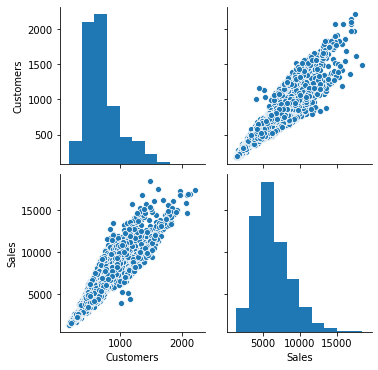

In [108]:
# Visualize the possible clusters
sns.pairplot(X_train)

In [109]:
from sklearn.cluster import KMeans
model_KMeans = KMeans(n_clusters=5,random_state=10)
model_KMeans.fit(X_train)

KMeans(n_clusters=5, random_state=10)

In [110]:
ClusterTrain=model_KMeans.predict(X_train)
ClusterTest=model_KMeans.predict(X_test)

In [111]:
traindata['Cluster']=ClusterTrain

In [112]:
traindata

,Store,Week,Day,DayofYear,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Cluster
0,1,27,30,181,2,2015-06-30,5735,568,1,1,0,0,0
1,2,27,30,181,2,2015-06-30,9863,877,1,1,0,0,1
2,3,27,30,181,2,2015-06-30,13261,1072,1,1,0,1,4
3,4,27,30,181,2,2015-06-30,13106,1488,1,1,0,0,4
4,5,27,30,181,2,2015-06-30,6635,645,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,6,1,2,2,3,2013-01-02,6089,781,1,0,0,1,0
7546,7,1,2,2,3,2013-01-02,8244,955,1,0,0,1,2
7547,8,1,2,2,3,2013-01-02,5419,698,1,0,0,1,0
7548,9,1,2,2,3,2013-01-02,4903,481,1,0,0,1,0


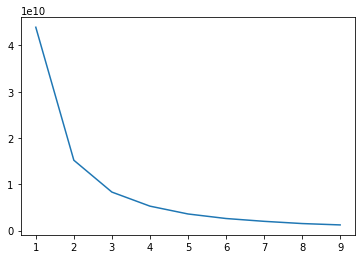

In [113]:
# To verify the number of clusters we can use Elbow method using Kmeans++
# In kmeans, the metric that we use to check the quality of cluster group creation is 
# WCSS(Within Cluster Sum of Squares)

wcss=[]
for i in range(1,10):
    model_KMeans = KMeans(n_clusters=i)
    model_KMeans.fit(X_train)
    wcss.append(model_KMeans.inertia_)

plt.plot(range(1,10),wcss)

In [114]:
# From above plot we can considere the number of cluster to be either 2 or 3.
model_KMeans = KMeans(n_clusters=2,random_state=10)
model_KMeans.fit(X_train)
ClusterTrain=model_KMeans.predict(X_train)
ClusterTest=model_KMeans.predict(X_test)

traindata['Cluster']=ClusterTrain
test_hiddata['Cluster']=ClusterTest
traindata.Cluster.replace([0,1],['Cluster1','Cluster2'],inplace=True)
test_hiddata.Cluster.replace([0,1],['Cluster1','Cluster2'],inplace=True)

In [115]:
traindata

,Store,Week,Day,DayofYear,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Cluster
0,1,27,30,181,2,2015-06-30,5735,568,1,1,0,0,Cluster1
1,2,27,30,181,2,2015-06-30,9863,877,1,1,0,0,Cluster2
2,3,27,30,181,2,2015-06-30,13261,1072,1,1,0,1,Cluster2
3,4,27,30,181,2,2015-06-30,13106,1488,1,1,0,0,Cluster2
4,5,27,30,181,2,2015-06-30,6635,645,1,1,0,0,Cluster1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,6,1,2,2,3,2013-01-02,6089,781,1,0,0,1,Cluster1
7546,7,1,2,2,3,2013-01-02,8244,955,1,0,0,1,Cluster2
7547,8,1,2,2,3,2013-01-02,5419,698,1,0,0,1,Cluster1
7548,9,1,2,2,3,2013-01-02,4903,481,1,0,0,1,Cluster1


In [116]:
traindata.Cluster.value_counts()

Cluster1    5131
Cluster2    2419
Name: Cluster, dtype: int64

#### Build separate prediction models for each cluster and Compare results with the previous models.

In [118]:
#Prepare Data for Cluster1

train_cluster1=traindata[traindata.Cluster=='Cluster1']
test_cluster1=test_hiddata[test_hiddata.Cluster=='Cluster1']

X_train=train_cluster1.drop(columns=['Sales','Date','Cluster']).values
X_test=test_cluster1.drop(columns=['Sales','Date','Cluster']).values

y_train=train_cluster1['Sales'].values
y_test=test_cluster1['Sales'].values
print(len(X_train),len(y_train), len(X_test),len(y_test))


#Lets train and evaluate the best Model(XGBoost Regressor) with Cluster 1 Data
approach='Model Training with  Cluster1 Data'
model_XGBR=XGBRegressor()
model_obj=model_XGBR
model_name='XGBoost Regressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

df_model_selection

5131 5131 180 180


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


In [119]:
#Prepare Data for Cluster2

train_cluster2=traindata[traindata.Cluster=='Cluster2']
test_cluster2=test_hiddata[test_hiddata.Cluster=='Cluster2']

X_train=train_cluster2.drop(columns=['Sales','Date','Cluster']).values
X_test=test_cluster2.drop(columns=['Sales','Date','Cluster']).values

y_train=train_cluster2['Sales'].values
y_test=test_cluster2['Sales'].values
print(len(X_train),len(y_train), len(X_test),len(y_test))


#Lets train and evaluate the best Model(XGBoost Regressor) with Cluster 2 Data
approach='Model Training with  Cluster2 Data'
model_XGBR=XGBRegressor()
model_obj=model_XGBR
model_name='XGBoost Regressor'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)
df_model_selection

2419 2419 90 90


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


In [120]:
%%time
#Lets train and evaluate the LSTM with Cluster 1 Data
train_cluster1=traindata[traindata.Cluster=='Cluster1']
test_cluster1=test_hiddata[test_hiddata.Cluster=='Cluster1']

X_train=train_cluster1.drop(columns=['Sales','Date','Store','Cluster']).values.astype('float32')
X_test=test_cluster1.drop(columns=['Sales','Date','Store','Cluster']).values.astype('float32')

y_train=train_cluster1.Sales.values.astype('float32')
y_test=test_cluster1.Sales.values.astype('float32')


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#Lets train and evaluate the LSTM model with Cluster 1 Data
#Initialize Sequential model
model_LSTM = Sequential()

#First Hidden Layer
model_LSTM.add(LSTM(50))
model_LSTM.add(BatchNormalization())

#Output Layer
model_LSTM.add(Dense(1))

#Compile the model
model_LSTM.compile(optimizer='adam', loss='mse')

#Train The model with Cross Validation
approach='LSTM with Cluster1 Data'
model_obj=model_LSTM
model_name='LSTM'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


#Exporting the results to csv
#df_model_selection.to_csv("Model_statistics-Until_LSTM",index = False)

df_model_selection

Wall time: 3min 43s


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


In [121]:
%%time
#Lets train and evaluate the LSTM with Cluster 2 Data
train_cluster2=traindata[traindata.Cluster=='Cluster2']
test_cluster2=test_hiddata[test_hiddata.Cluster=='Cluster2']

X_train=train_cluster2.drop(columns=['Sales','Date','Store','Cluster']).values.astype('float32')
X_test=test_cluster2.drop(columns=['Sales','Date','Store','Cluster']).values.astype('float32')

y_train=train_cluster2.Sales.values.astype('float32')
y_test=test_cluster2.Sales.values.astype('float32')


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#Lets train and evaluate the LSTM model with Cluster 1 Data
#Initialize Sequential model
model_LSTM = Sequential()

#Input Layer and Normalize input data
#model_LSTM.add(LSTM(50,return_sequences=True))
#model_LSTM.add(BatchNormalization())

#First Hidden Layer
model_LSTM.add(LSTM(50))
model_LSTM.add(BatchNormalization())

#Output Layer
model_LSTM.add(Dense(1))

#Compile the model
model_LSTM.compile(optimizer='adam', loss='mse')

#Train The model with Cross Validation
approach='LSTM with Cluster2 Data'
model_obj=model_LSTM
model_name='LSTM'
#model_traintest(model_obj, model_name, approach,X_train,y_train,X_test,y_test)
model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)

#Exporting the results to csv
df_model_selection.to_csv("Model_statistics_Upto_WK3_Tasks",index = False)

df_model_selection

Wall time: 1min 48s


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


#### Observation after retraining of XGBoost and LSTM with Cluster1 and Cluster Data

    It was observed that 
    1.There is no performance gain from LSTM model when trained with Cluster1 or Cluster2 data individually 
    2. XGBoost Regressor has shown improvement when trained with Cluster data however this is still not the best performance
    3. The best performing model is still XGBoost Regressor with without cluster.(95%) followed by Gradiant Boosting Regressor(94%) followed by  XGBoost Regressor with cluster1 data followed by Ensemble Technique(88%)

## Project Task: Week 4

**Applying ANN:**

    1.     Use ANN (Artificial Neural Network) to predict Store Sales.
       a)    Fine-tune number of layers,
       b)    Number of Neurons in each layers .
       c)    Experiment in batch-size.
       d)    Experiment with number of epochs. Carefully observe the loss and accuracy? What are the observations?
       e)    Play with different  Learning Rate  variants of Gradient Descent like Adam, SGD, RMS-prop.
       f)    Which activation performs best for this use case and why?
       g)    Check how it performed in the dataset, calculate RMSE.
       
    2. Use Dropout for ANN and find the optimum number of clusters (clusters formed considering the features: sales and 
    customer visits). Compare model performance with traditional ML based prediction models. 
    
    3. Find the best setting of neural net that minimizes the loss and can predict the sales best. Use techniques like Grid
       search, cross-validation and Random search.



### Code :

In [4]:
#Prepare Data
traindata=traindata_init[(traindata_init.Sales !=0)&(traindata_init.Store.isin(storeList))]
traindata.reset_index(drop=True,inplace=True)

test_hiddata=test_hiddata_init[(test_hiddata_init.Sales !=0)&(test_hiddata_init.Store.isin(storeList))]
test_hiddata.reset_index(drop=True,inplace=True)

X_train=traindata.drop(columns=['Sales','Date','Store']).values.astype('float32')
X_test=test_hiddata.drop(columns=['Sales','Date','Store']).values.astype('float32')
#X_train=SC.fit_transform(X_train) # Perform feature scaling on train  data
#X_test=SC.fit_transform(X_test) # Perform feature scaling on test data

y_train=traindata.Sales.values.astype('float32')
y_test=test_hiddata.Sales.values.astype('float32')


print(len(X_train),len(y_train), len(X_test),len(y_test))

7550 7550 270 270


In [124]:
X_train.shape,X_test.shape

((7550, 9), (270, 9))

In [7]:
# fix random seed for reproducibility
np.random.seed(7)
#Initialize Sequential model
model_ANN = tf.keras.models.Sequential()
#Input Layer
model_ANN.add(tf.keras.layers.Reshape((9,),input_shape=(9,)))
#Normalize the data
model_ANN.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model_ANN.add(tf.keras.layers.Dense(200, activation='relu'))
#Dropout layer
#model_ANN.add(tf.keras.layers.Dropout(0.5))
#Normalize the data
model_ANN.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model_ANN.add(tf.keras.layers.Dense(100, activation='relu'))
#Dropout layer
#model_ANN.add(tf.keras.layers.Dropout(0.4))
#Normalize the data
model_ANN.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model_ANN.add(tf.keras.layers.Dense(50, activation='relu'))
#Dropout layer
#model_ANN.add(tf.keras.layers.Dropout(0.3))
#Normalize the data
model_ANN.add(tf.keras.layers.BatchNormalization())

#Add 4th hidden layer
#model_ANN.add(tf.keras.layers.Dense(50, activation='relu'))
#Dropout layer
#model_ANN.add(tf.keras.layers.Dropout(0.3))
#Normalize the data
#model_ANN.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model_ANN.add(tf.keras.layers.Dense(1))


#Compile the model
model_ANN.compile(optimizer='adam', loss='mse')
#model_ANN.compile(optimizer='rmsprop', loss='mse')

In [126]:
%%time
#Train the model with Cross Validation
approach='ANN-3HidLayer-Adam-Epoch150-batchsize32'
model_obj=model_ANN
model_name='ANN'

model_traintest_CV(model_obj, model_name, approach,X_train,y_train,n_splits)


#Exporting the results to csv
df_model_selection.to_csv("Model_statistics_upto_Wk4_Tasks",index = False)

df_model_selection


Wall time: 4min 25s


,Approach,Model Name,r2 Scores,Range of r2 Scores,SD of r2 Scores,RMSE,Range of RMSE,MAE,Range of MAE
0,Model Training with 10 Stores Data,Linear Regression,"[0.94, 0.94, 0.94, 0.95, 0.95]",0.94-0.95,0.01,"[747.0, 750.0, 753.0, 759.0, 761.0]",747.0-761.0,"[539.01, 544.88, 548.35, 548.62, 554.01]",539.01-554.01
0,Model Training with Store1 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.99]",0.98-0.99,0.00,"[243.0, 260.0, 261.0, 263.0, 264.0]",243.0-264.0,"[189.32, 191.26, 195.81, 199.95, 204.91]",189.32-204.91
0,Model Training with Store2 Data,Linear Regression,"[0.94, 0.94, 0.96, 0.96, 0.97]",0.94-0.97,0.01,"[420.0, 455.0, 481.0, 551.0, 598.0]",420.0-598.0,"[304.21, 326.6, 333.4, 333.8, 340.42]",304.21-340.42
0,Model Training with Store3 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.98, 0.98]",0.97-0.98,0.01,"[450.0, 475.0, 527.0, 560.0, 587.0]",450.0-587.0,"[348.45, 360.18, 373.76, 402.8, 404.99]",348.45-404.99
0,Model Training with Store4 Data,Linear Regression,"[0.99, 0.99, 0.99, 0.99, 0.99]",0.99-0.99,0.00,"[389.0, 410.0, 411.0, 417.0, 461.0]",389.0-461.0,"[288.51, 303.81, 304.2, 305.83, 345.36]",288.51-345.36
0,Model Training with Store5 Data,Linear Regression,"[0.96, 0.96, 0.97, 0.97, 0.97]",0.96-0.97,0.01,"[425.0, 428.0, 435.0, 480.0, 511.0]",425.0-511.0,"[322.94, 332.13, 334.76, 347.04, 353.21]",322.94-353.21
0,Model Training with Store6 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[308.0, 317.0, 323.0, 342.0, 343.0]",308.0-343.0,"[228.1, 238.39, 251.72, 253.29, 265.95]",228.1-265.95
0,Model Training with Store7 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.97]",0.97-0.97,0.00,"[661.0, 661.0, 667.0, 707.0, 725.0]",661.0-725.0,"[479.93, 502.99, 507.38, 510.57, 515.9]",479.93-515.9
0,Model Training with Store8 Data,Linear Regression,"[0.97, 0.97, 0.97, 0.97, 0.98]",0.97-0.98,0.00,"[411.0, 444.0, 469.0, 476.0, 493.0]",411.0-493.0,"[313.53, 319.11, 344.25, 361.63, 363.62]",313.53-363.62
0,Model Training with Store9 Data,Linear Regression,"[0.98, 0.98, 0.98, 0.98, 0.98]",0.98-0.98,0.00,"[348.0, 350.0, 371.0, 384.0, 387.0]",348.0-387.0,"[248.59, 249.59, 261.29, 261.74, 261.85]",248.59-261.85


#### Below are the performance statistics for different combinations Layers,variants of Gradient Descent,epochs,batchsize
    Approach	 Model_Name	                                      r2_Scores	      RMSE	       MAE

    0	ANN-1HidLayer-ADAM-Epoch150-batchsize32	ANN	                 0.86	     963.0	     645.989990
    0	ANN-2HidLayer-ADAM-Epoch150-batchsize32	ANN	                 0.84	    1009.0	     721.090027
    0	ANN-3HidLayer-ADAM-Epoch150-batchsize32	ANN	                 0.87	     923.0	     664.630005
    0	ANN-3HidLayer-ADAM-Epoch200-batchsize32	ANN	                 0.87	     927.0	     649.630005
    0	ANN-4HidLayer-ADAM-Epoch200-batchsize32	ANN	                 0.86	     949.0	     691.940002
    0	ANN-4HidLayer-ADAM-Epoch200-batchsize32	ANN	                 0.85	     968.0	     697.450012
    0	ANN-4HidLayer-ADAM-Epoch200-batchsize32-WithDropout	         0.77       1225.0	     872.659973
    0	ANN-4HidLayer-ADAM-Epoch300-batchsize32-WithDrropout	     0.74	    1294.0	     890.650024
    0	ANN-3HidLayer-ADAM-Epoch200-batchsize32-WithDrropout	     0.83	    1046.0	     800.289978
    0	ANN-3HidLayer-ADAM-Epoch150-batchsize32-WithDropout	         0.76	    1234.0	     921.039978
    0	ANN-3HidLayer-ADAM-Epoch150-batchsize32-WithDrropout	     0.82	    1091.0	     819.650024
    0	ANN-3HidLayer-ADAM-Epoch150-batchsize32	ANN	                 0.86	     937.0	     684.950012
    0	ANN-3HidLayer-RMSPROP-Epoch150-batchsize32	ANN	             0.86	     944.0	     669.960022

#### Lets extract the best sample , retrain the Neural Network and predict the forcast using Unseen Test Data(X_test)

In [43]:
traindata=traindata_init[(traindata_init.Sales !=0)&(traindata_init.Store.isin(storeList))]
X=traindata.drop(columns=['Sales','Date','Store']).values.astype('float32')
y=traindata.Sales.values.astype('float32')

In [47]:
%%time
#Initialize StratifiedKFold Method
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, 
              random_state=1,
              shuffle=True)

#Initialize For Loop 

i=0
for train,test in kfold.split(X,y):
    i = i+1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    
    model_ANN.fit(X_train,y_train,epochs=150,batch_size=32,verbose=0)
    test_ds_predicted=model_ANN.predict(X_test)
    train_ds_predicted=model_ANN.predict(X_train)
    
    test_r2_score=round(r2_score(y_true=y_test, y_pred=test_ds_predicted ),2)
    train_r2_score=round(r2_score(y_true=y_train, y_pred=train_ds_predicted ),2)
    
    print("Train r2-Score: {}, Test r2-score: {}, for Sample Split: {}".format(train_r2_score,test_r2_score,i))

Train r2-Score: 0.92, Test r2-score: 0.9, for Sample Split: 1
Train r2-Score: 0.92, Test r2-score: 0.91, for Sample Split: 2
Train r2-Score: 0.93, Test r2-score: 0.88, for Sample Split: 3
Train r2-Score: 0.92, Test r2-score: 0.92, for Sample Split: 4
Train r2-Score: 0.91, Test r2-score: 0.92, for Sample Split: 5
Wall time: 4min 13s


In [50]:
%%time
#Lets extract the Train and Test sample for split 4
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, 
              random_state=1,
              shuffle=True)
i=0
for train,test in kfold.split(X,y):
    i = i+1
    if i == 4:
        X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]     
        
#Refit the model with best train and test sample
model_ANN.fit(X_train,y_train,epochs=150,batch_size=32,verbose=0)


Wall time: 1min 10s


In [53]:
### Evalute the model with Unseen test Data(X_test)
X_test=test_hiddata.drop(columns=['Sales','Date','Store']).values.astype('float32')
y_test=test_hiddata.Sales.values.astype('float32')

test_ds_predicted=model_ANN.predict(X_test)
train_ds_predicted=model_ANN.predict(X_train)
    
test_r2_score=round(r2_score(y_true=y_test, y_pred=test_ds_predicted ),2)
train_r2_score=round(r2_score(y_true=y_train, y_pred=train_ds_predicted ),2)
    
print("Train r2-Score: {}, Test r2-score: {}".format(train_r2_score,test_r2_score))

Train r2-Score: 0.91, Test r2-score: 0.86


#### Final Observations
    1. ANN test r2 score is 86 % with best settings after 5 fold cross validation.What it means is that ANN performance is still below par  as compared to Traditional ML model for this use case. One of the reason could be insuficient data. We have trained our model with just 10 stores data. Retraining the model with full set of data might give better score. This needs to be tested separately.
    2. Clustering the data and training separately within each cluster did not improve the performance
    3. The best performing models for this usecase are
        1. XGBoost Regressor  with Test R2 Score of 99% 
        2. Gradiant Boosting Regressor with Test R2 Score of 99% 
        3. Random Forest Regressor with Test R2 Score of 97%
        4. ANN-3HidLayer-Adam-Epoch150-batchsize32 with Test R2 Score of 86%

